# Estatística Frequências e Medidas - Desafio Final


Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior `amplitude` de nota?


2. Qual é a `média e a mediana` para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

  a. Redação - 2

  b. Matemática e suas Tecnologias - 4
  
  c. Linguagens, Códigos e suas Tecnologias - 2

  d. Ciências Humanas e suas Tecnologias - 1

  e. Ciências da Natureza e suas Tecnologias - 1

- Qual o `desvio padrão e média` das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a `variância e média` da nota dos
estudantes que entraram no curso de ciência da computação?


5. Qual o valor do teto do `terceiro quartil` para as disciplinas de
matemática e linguagens?


6. Faça o `histograma` de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?


7. Agora coloque um `range` fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? `[plt.hist(dado, bins=_, range=[0, 1000])`


8. Faça um `boxplot do quartil` de todas as disciplinas de ciências da
natureza e redação. É possível enxergar `outliers`? Utilize o `método IQR.`


9. Remova todos os `outliers` e verifique se eles são passíveis de alterar a
`média` nacional significativamente? (considere significativamente um
valor acima de 5%)


10. Considerando valores nulos, tente encontrar qual seria a melhor `medida
de tendência` que pode substituir as notas nulas. `Média, moda ou
mediana?` Substitua o valor por todos os três e diga qual delas altera
menos a `média geral` e o `desvio padrão.`

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregando dataframe

df = pd.read_json("enem_2023.json")
df.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


1. Qual das disciplinas tem a maior `amplitude` de nota?

In [ ]:
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].min() # nota mínima de cada disciplina

In [ ]:
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].max() # nota máxima de cada disciplina

In [ ]:
df.describe()

In [ ]:
def describe_new(df): # Função que calcula a amplitude de cada disciplina
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    return df1

resposta = describe_new(df).loc['amplitude'].idxmax() # Procura a disciplina com a maior amplitude
print('A disciplina com a maior AMPLITUDE é:', resposta)

A disciplina com a maior AMPLITUDE é: Redação


2. Qual é a `média e a mediana` para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)

In [ ]:
df.describe().loc['mean'].round(2) # Média de cada disciplina

Linguagens              514.52
Ciências humanas        527.04
Ciências da natureza    499.32
Matemática              535.97
Redação                 637.78
Name: mean, dtype: float64

In [ ]:
# Mediana de cada disciplina sem os valores nulos
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median(skipna = True).round(2)

Linguagens              515.05
Ciências humanas        524.52
Ciências da natureza    500.48
Matemática              533.25
Redação                 635.27
dtype: float64

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

  a. Redação - 2

  b. Matemática e suas Tecnologias - 4
  
  c. Linguagens, Códigos e suas Tecnologias - 2

  d. Ciências Humanas e suas Tecnologias - 1

  e. Ciências da Natureza e suas Tecnologias - 1

- Qual o `desvio padrão e média` das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [ ]:
df_ufpe = df # Faz uma cópia do dataframe

In [ ]:
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1} # Definindo o peso de cada disciplina

In [ ]:
# Cálculo da média ponderada
df_ufpe['Média Ponderada'] = (
    df_ufpe['Redação'] * pesos['Redação'] +
    df_ufpe['Ciências humanas'] * pesos['Ciências humanas'] +
    df_ufpe['Ciências da natureza'] * pesos['Ciências da natureza'] +
    df_ufpe['Matemática'] * pesos['Matemática'] +
    df_ufpe['Linguagens'] * pesos['Linguagens']
) / 10

df_ufpe.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher,NaN
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,543.765146


In [ ]:
df_ufpe_500 = df_ufpe.nlargest(500, 'Média Ponderada') # Seleciona os 500 estudantes mais bem colocados segundo a média ponderada

In [ ]:
media_curso = df_ufpe_500['Média Ponderada'].mean() # Média da média ponderada
print('A MÉDIA das notas dos 500 estudantes mais bem colocados é:', media_curso.round(2))

A MÉDIA das notas dos 500 estudantes mais bem colocados é: 557.29


In [ ]:
desvio_padrao_curso = df_ufpe_500['Média Ponderada'].std() # Desvio padrão da média ponderada
print('O DESVIO PADRÃO das notas dos 500 estudantes mais bem colocados é:', desvio_padrao_curso.round(2))

O DESVIO PADRÃO das notas dos 500 estudantes mais bem colocados é: 40.44


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a `variância e média` da nota dos
estudantes que entraram no curso de ciência da computação?


In [ ]:
notas = df_ufpe_500['Média Ponderada'].sort_values(ascending=False)

admitidos = notas[:40] # Selecionando os 40 estudantes para o curso de ciência da computação

media40 = admitidos.mean()
print('A MÉDIA das notas dos 40 estudantes selecionados é:', media40.round(2))

A MÉDIA das notas dos 40 estudantes selecionados é: 636.68


In [ ]:
variancia40 = admitidos.var()
print('A VARIÂNCIA das notas dos 40 estudantes selecionados é:', variancia40.round(2))

A VARIÂNCIA das notas dos 40 estudantes selecionados é: 295.77


5. Qual o valor do teto do `terceiro quartil` para as disciplinas de
matemática e linguagens?

In [ ]:
q3_matematica = df['Matemática'].quantile(.75).round(2) # Calcula o terceiro quartil de matemática
print('O valor do teto do terceiro quartil para MATEMÁTICA é:', q3_matematica)

O valor do teto do terceiro quartil para MATEMÁTICA é: 592.91


In [ ]:
q3_linguagens = df['Linguagens'].quantile(.75).round(2)
print('O valor do teto do terceiro quartil para LINGUAGENS é:', q3_linguagens)

O valor do teto do terceiro quartil para LINGUAGENS é: 571.64


6. Faça o `histograma` de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

<Figure size 800x400 with 0 Axes>

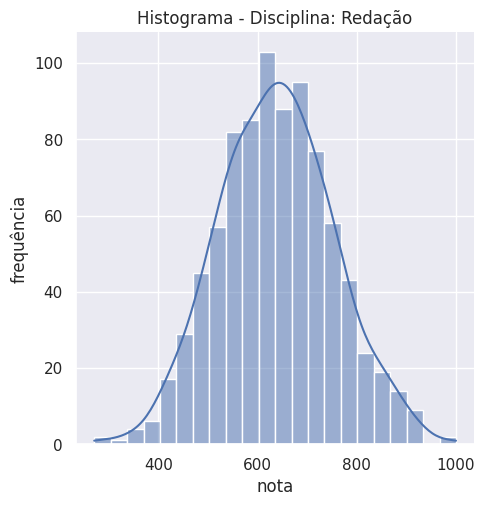

<Figure size 800x400 with 0 Axes>

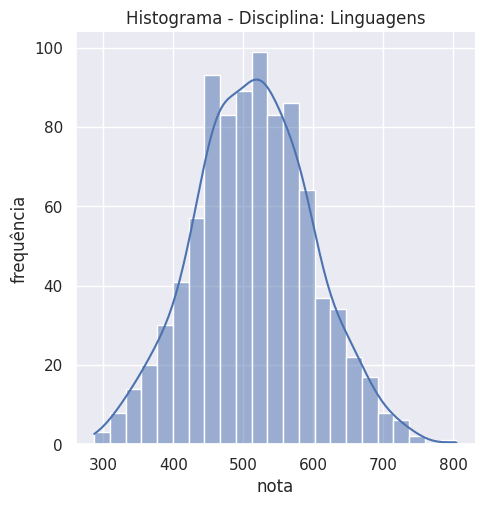

In [ ]:
sns.set_theme()

novo_histograma = ['Redação', 'Linguagens'] # Definindo as disciplinas

for column in novo_histograma: # construindo o histograma
    plt.figure(figsize=(8,4))
    sns.displot(data = df , x = column, kde= True)
    plt.xlabel('nota')
    plt.ylabel('frequência')
    plt.title("Histograma - Disciplina: "+column)

Resposta da questão 6: Ambos os histogramas são simétricos, pois estão centrados.

7. Agora coloque um `range` fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? `[plt.hist(dado, bins=_, range=[0, 1000])`

<Figure size 800x400 with 0 Axes>

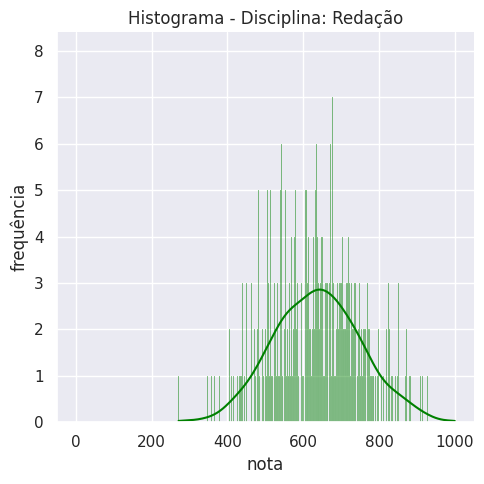

<Figure size 800x400 with 0 Axes>

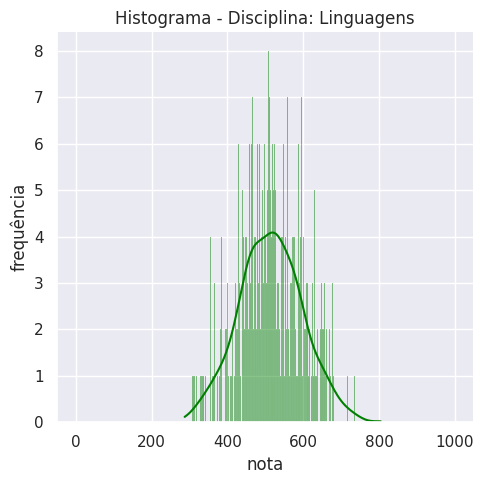

In [ ]:
sns.set_theme()

novo_histograma = ['Redação', 'Linguagens'] # Definindo as disciplinas

for column in novo_histograma: # Construindo o histograma
    plt.figure(figsize=(8,4))
    sns.displot(df[column], bins = range(0, 1000), kde= True, color='green')
    plt.xlabel('nota')
    plt.ylabel('frequência')
    plt.title("Histograma - Disciplina: "+column)

    plt.tight_layout()
    plt.show()

Acredito que os histogramas não se tornaram assimétricos após adicionar o range.

8. Faça um `boxplot do quartil` de todas as disciplinas de ciências da
natureza e redação. É possível enxergar `outliers`? Utilize o `método IQR.`

In [ ]:
enem = df # Copiando o dataframe

def metodo(enem, materia): # Uma função que está definindo o o primeiro e o terceiro quartil, iqr, lower e upper para cada disciplina
  q1 = enem[materia].quantile(.25)
  q3 = enem[materia].quantile(.75)
  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  outlier = []

  # Fazendo o cálculo para descobrir quantos outliers cada disciplina tem
  for i in enem[materia].values:
    if i > upper or i < lower:
      outlier.append(i)

  print('Qtdade de outliers para a matéria {} são: {}'.format(materia, len(outlier)))

metodo(enem, 'Ciências da natureza')
metodo(enem, 'Redação')

Qtdade de outliers para a matéria Ciências da natureza são: 3
Qtdade de outliers para a matéria Redação são: 4


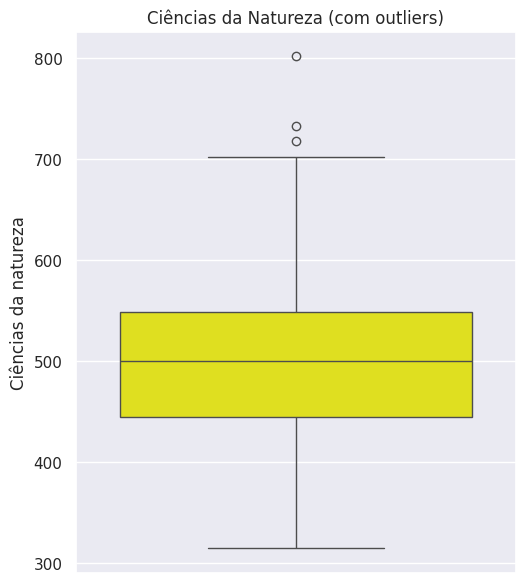

In [ ]:
# Boxplot de ciências da natureza

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='Ciências da natureza', data=enem, color='yellow')
plt.title('Ciências da Natureza (com outliers)')

plt.tight_layout()
plt.show()

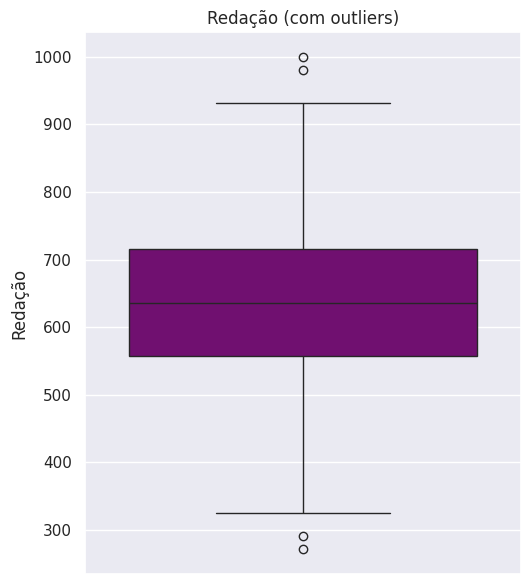

In [ ]:
# Boxplot de Redação

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
sns.boxplot(y='Redação', data=enem, color='purple')
plt.title('Redação (com outliers)')

plt.tight_layout()
plt.show()

9. Remova todos os `outliers` e verifique se eles são passíveis de alterar a `média` nacional significativamente? (considere significativamente um
valor acima de 5%)

In [ ]:
# Função para descobrir e remover os outliers de cada matéria
def remove_outliers(df, materia):
    q1 = df[materia].quantile(.25)
    q3 = df[materia].quantile(.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df_cleaned = df[(df[materia] >= lower) & (df[materia] <= upper)]

    return df_cleaned

In [ ]:
# Função para calcular a média nacional de cada matéria antes e depois dos outliers
def calcular_media_nacional(df, materia):
    media_nacional_antes = df[materia].mean()

    df_sem_outliers = remove_outliers(df, materia)
    media_nacional_depois = df_sem_outliers[materia].mean()

    return media_nacional_antes, media_nacional_depois

In [ ]:
# Função para descobrir se existe uma mudança significativa no antes e depois
def verificar_mudanca_significativa(media_antes, media_depois):
    mudanca_percentual = ((media_depois - media_antes) / media_antes) * 100
    if abs(mudanca_percentual) > 5:
        return True
    else:
        return False

In [ ]:
# Resultado final

materias = ['Ciências da natureza', 'Redação', 'Matemática', 'Linguagens', 'Ciências humanas']

for materia in materias:
    media_antes, media_depois = calcular_media_nacional(enem, materia)
    mudanca_significativa = verificar_mudanca_significativa(media_antes, media_depois)

    print(f'{materia}')
    print(f'Antes: {media_antes:.2f}')
    print(f'Depois: {media_depois:.2f}')

    if mudanca_significativa:
        print(f'A média foi significativamente alterada.\n')
    else:
        print(f'A média não foi significativamente alterada.\n')


Ciências da natureza
Antes: 499.32
Depois: 498.40
A média não foi significativamente alterada.

Redação
Antes: 637.78
Depois: 637.79
A média não foi significativamente alterada.

Matemática
Antes: 535.97
Depois: 535.11
A média não foi significativamente alterada.

Linguagens
Antes: 514.52
Depois: 514.19
A média não foi significativamente alterada.

Ciências humanas
Antes: 527.04
Depois: 526.11
A média não foi significativamente alterada.



10. Considerando valores nulos, tente encontrar qual seria a melhor `medida
de tendência` que pode substituir as notas nulas. `Média, moda ou
mediana?` Substitua o valor por todos os três e diga qual delas altera
menos a `média geral` e o `desvio padrão.`

In [ ]:
material = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']] # Fazendo cópia do dataframe só com disciplinas selecionadas

In [ ]:
# Função que substitui os valores nulos
def substituir_valores_nulos(df, medida):
    df_preenchido = df.fillna(medida)
    return df_preenchido

# Função que calcula a média geral e o desvio padrão
def calcular_estatisticas(df):
    media_geral = df.stack().mean()
    desvio_padrao_geral = df.stack().std()
    return media_geral, desvio_padrao_geral

# Calcular estatísticas para o DataFrame original
media_original, desvio_padrao_original = calcular_estatisticas(material)

# Substituir valores nulos com média
material_media = substituir_valores_nulos(material, material.mean())
media_media, desvio_padrao_media = calcular_estatisticas(material_media)

# Substituir valores nulos com moda
material_moda = substituir_valores_nulos(material, material.mode().iloc[0])
media_moda, desvio_padrao_moda = calcular_estatisticas(material_moda)

# Substituir valores nulos com mediana
material_mediana = substituir_valores_nulos(material, material.median())
media_mediana, desvio_padrao_mediana = calcular_estatisticas(material_mediana)

# Comparar os resultados
print("Média original:", media_original.round(2))
print("Desvio padrão original:", desvio_padrao_original.round(2), '\n')

print("Média após substituir com MÉDIA:", media_media.round(2))
print("Desvio padrão após substituir com MÉDIA:", desvio_padrao_media.round(2), '\n')

print("Média após substituir com MODA:", media_moda.round(2))
print("Desvio padrão após substituir com MODA:", desvio_padrao_moda.round(2), '\n')

print("Média após substituir com MEDIANA:", media_mediana.round(2))
print("Desvio padrão após substituir com MEDIANA:", desvio_padrao_mediana.round(2))


Média original: 542.67
Desvio padrão original: 101.52 

Média após substituir com MÉDIA: 542.93
Desvio padrão após substituir com MÉDIA: 97.43 

Média após substituir com MODA: 515.13
Desvio padrão após substituir com MODA: 123.36 

Média após substituir com MEDIANA: 542.83
Desvio padrão após substituir com MEDIANA: 97.35


In [ ]:
# Cálculo para descobrir a diferença a média original e substituida + o desvio padrão original e substituido de cada tendência

calculo_media_media = media_original - media_media
calculo_desvio_media = desvio_padrao_original - desvio_padrao_media
calculo_media_final = calculo_media_media + calculo_desvio_media

calculo_media_moda = media_original - media_moda
calculo_desvio_moda = desvio_padrao_original - desvio_padrao_moda
calculo_moda_final = calculo_media_moda + calculo_desvio_moda

calculo_media_mediana = media_original - media_mediana
calculo_desvio_mediana = desvio_padrao_original - desvio_padrao_mediana
calculo_mediana_final = calculo_media_mediana + calculo_desvio_mediana

# Esse IF serve para descobrir se a MÉDIA, MODA OU MEDIANA que altera menos a média geral e o desvio padrão
if calculo_media_final < calculo_moda_final and calculo_media_final < calculo_mediana_final:
  vencedor = calculo_media_final
  print('A MÉDIA altera menos a média geral e o desvio padrão')
elif calculo_moda_final < calculo_media_final and calculo_moda_final < calculo_mediana_final:
  vencedor = calculo_moda_final
  print('A MODA altera menos a média geral e o desvio padrão')
elif calculo_mediana_final < calculo_moda_final and calculo_mediana_final < calculo_media_final:
  vencedor = calculo_mediana_final
  print('A MEDIANA altera menos a média geral e o desvio padrão')

A MÉDIA altera menos a média geral e o desvio padrão
